#A Case Study on Probability Distributions



## Problem Statement

Akshay decided to use probability distributions for finding outliers and other useful information about the athletes while also understanding the spread of the dataset. He wanted to use basic distributions such as normal distributions, binomial distributions, uniform distributions, etc. Akshay also has another dataset from which he hopes to examine the earnings of different athletes. Akshay also wants to uncover outliers in the data as well as the most likely combinations of elements.

## Dataset Description
<br>

 **rcc** - Red Blood Cell Count, in 1012-1

 **Wcc** - White Blood Cell Count, in 1012 per liter
 
 **Hc** - Hematocrit, percent

 **Hg** - Hemaglobin Concentration, in g per decaliter

 **Ferr** - Plasma Ferritins, ng dl-1

 **Bmi** - Body Mass Index, kg cm-2102

 **ssf** - sum of skin folds

 **pcBfat** - Percent Body Fat

 **Lbm** - Lean Body Mass, kg

 **Ht** - Height, cm

 **Wt** - Weight, kg

 **Sex** - a factor with levels f m
 
 **Sport** - This includes a variety of sports fields (B_Ball, Row, Netball, Swim, Field, T_400m, T_Sprnt, Tennis, Gym, and W_Polo). 

<a id='toc0_'></a>**Table of contents**  

- [**A Case Study on Probability Distributions**](#toc1_)        
  - [**1. Introduction**](#toc1_1_)
      - [**What is Probability Distrbution**](#toc1_1_1)
  - [**2. Importing Necessary Libraries**](#toc1_2_)    
  - [**3. Loading Dataset**](#toc1_3_)    
  - [**4. Perform Exploratory Data Analysis**](#toc1_4_)    
    - [**Finding and handling null values**](#toc1_4_1_)
    - [**Finding and handling duplicate values**](#toc1_4_2_)    
    - [**Dropping the Duplicated Values**](#toc1_4_3_)    
    - [**The number of unique values for each column**](#toc1_4_4_) 
    - [**Finding the Correlations between the columns**](#toc1_4_5_)  
  - [**5. Normal Distribution**](#toc1_5_) 
  - [**6. Uniform Distribution**](#toc1_6_) 
  - [**7. Binominal Distribution**](#toc1_7_)
  - [**8. Bernoulli Distribution**](#toc1_10_)
  - [**9. Poisson Distribution**](#toc1_8_)
  - [**10. Exponential Distribution**](#toc1_9_)
  - [**11. Conclusion**](#toc1_11_)


## <a id='toc1_1_'></a>[1. Introduction](#toc0_)

## <a id='toc1_2_1'></a>[What is Probability Distribution](#toc0_)

A probability distribution is a statistical function that helps describe the probability of reaching potential values ​​of a random variable. Determine all the possibilities that a random variable can represent from a range of values. This range includes lower and upper bounds containing the minimum and maximum values ​​required for analysis from the dataset.


In this case study, we will examine the following six forms of probability distribution:


1. Normal Distribution
2. Uniform distribution
3. Binomial Distribution
4. Poisson distribution
5. Exponential Distribution
6. Bernoulli distribution




## <a id='toc1_2_'></a>[2. Importing Necessary Libraries](#toc0_)
Here we are importing the libraries that are used in the code.<br>

The following libraries are imported:<br>
* Pandas : for Data Manuplation<br>
* Numpy : for Numerical computation.<br>
* seaborn and matplotlib and plotly : for beautiful Data Visualization <br>

In [ ]:
#importing necessary libraries
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## <a id='toc1_3_'></a>[3. Loading Dataset](#toc0_)
Here we are using the pandas module to import the dataset from the "CSV" file using the `read_csv()` Function.<br>

You can read more about on <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html"> This Link</a>.

In [ ]:
df = pd.read_csv('aus.csv') #loading the csv File to dataset

Here we are using the `head()` method to see the first five rows of the columns.

In [ ]:
df.head(10)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
5,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,53.77,174.0,63.7,f,B_Ball
6,4.31,5.3,39.6,12.8,73,21.69,87.2,19.99,60.17,186.2,75.2,f,B_Ball
7,4.42,5.7,39.9,13.2,44,20.62,97.9,22.43,48.33,173.8,62.3,f,B_Ball
8,4.30,8.9,41.1,13.5,41,22.64,75.1,17.95,54.57,171.4,66.5,f,B_Ball
9,4.51,4.4,41.6,12.7,44,19.44,65.1,15.07,53.42,179.9,62.9,f,B_Ball


Here we are going to take look at the names of the columns.<br>

We can use the `columns()` method to see the list that contains names of the columns.<br>


In [ ]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

Let's take small look at the datatype of the values of each colum.<br>

We can do it by using the `info()` method of the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


As you can see, there are one column with integer values, two columns with objects values, and ten more columns with float type values. 

## <a id='toc1_4_'></a>[4. Perform Exploratory Analysis](#toc0_)

## <a id='toc1_5_1_'></a>[Finding and handling null values.](#toc0_)

You can check for the null values by method called as `isna()`.

You can read more about on <a href="https://pythontic.com/pandas/dataframe-manipulations/duplicates-and-missing-values#:~:text=The%20drop_duplicates()%20method%20removes,with%20the%20parameter%20%22keep%22."> This link</a>.<br>

Hint:- also use the `sum()` method to get the numbers of null values.<br>

In [ ]:
df.isna().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

There is no null values in the dataset.

## <a id='toc1_5_2_'></a>[Finding and handling duplicate values.](#toc0_)


Here you can check you the duplicated values by using the `duplicated()` method from pandas dataframe.<br>

You can read more about it in <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html">This link</a>.<br>

Hint:- also use the `sum()` method to get the numbers of null values.<br>

In [ ]:
df.duplicated().sum()

0

Here you can see the Numbers of the duplicate rows which are present in the dataset.

## <a id='toc1_5_3_'></a>[Dropping the Duplicated Values.](#toc0_)


Here for dropping the Duplicate values by using the `drop_duplicated()` method.<br>

You can read more about it on <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html">This link.</a>

In [ ]:
df.drop_duplicates(inplace=True) #dropping the duplicated values

## <a id='toc1_5_4_'></a>[The number of unique values for each column.](#toc0_)
Here we are checking the null values for each columns <br>

Here we are using `nunique()` method to get the numbers od unique values in columns <br>

You can read more about `nunique()` on <a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html">this link  </a>

In [ ]:
for i in df.columns:
    print(i,df[i].nunique())

rcc 114
wcc 70
hc 105
hg 55
ferr 111
bmi 180
ssf 176
pcBfat 180
lbm 135
ht 147
wt 161
sex 2
sport 10


Here, we are going to see the unique values of sport column

In [ ]:
df['sport'].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

### <a id='toc1_5_4_'></a>[Finding the Correlations between the columns](#toc0_)
In statistics, correlation or dependence is used to describe any statistical relationship, whether causal or not, between two random variables or bivariate data.<br>
It is used to know that like which columns are related with each other. <br>

You can read more about it on <a href="https://en.wikipedia.org/wiki/Correlation">This link</a>.

In [ ]:
df.corr()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913
ht,0.358854,0.076811,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780932


##Measures of Skewness and Kurtosis

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Distribution on the basis of skewness value:**

* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.

**Kurtosis** is a metric that indicates how heavy-tailed or light-tailed the data are in comparison to a normal distribution. In other words, data sets with a high kurtosis tend to have large outliers or heavy tails. Data sets with low kurtosis usually less outliers and have light tails. The worst-case scenario would be a uniform distribution.

**Distribution on the basis of Kurtosis value:**

* kurtosis for normal distribution is equal to 3.
* For a distribution having kurtosis < 3: It is called playkurtic.
* For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

## <a id='toc1_5_'></a>[5. Normal Distrbution](#toc0_)

The normal distribution is a symmetric probability focused on the mean. This 
means that data close to the mean occur more frequently than data far from it. The normal distribution is also referred to as the Gaussian distribution. The curve for this distribution looks like a bell.
<br>
* The mean, median and mode are exactly the same.
* The distribution is symmetric about the mean—half the values fall below the mean and half above the mean.
*The distribution can be described by two values: the mean and the standard deviation.


You can read more about it in <a href="https://en.wikipedia.org/wiki/Normal_distribution">This link</a>.<br>

We are importing this stats library because it contains all of the statistics functions, which are located in the sub-package `scipy.stats()`

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


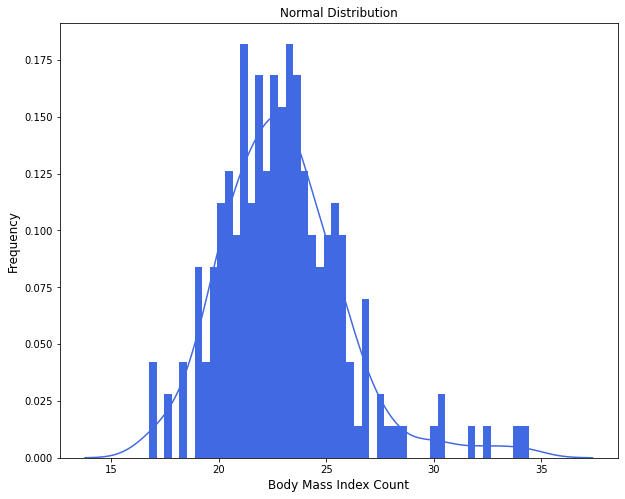

In [ ]:
import scipy.stats as stats
# plotting a histogram
plt.figure(figsize=(10,8))
ax = sns.distplot(df['bmi'],
                  bins=50,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 15,'alpha':1})
plt.xlabel('Body Mass Index Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Normal Distribution")
plt.show()

The area under the normal distribution curve represents probability, and the
total area under the curve sums to one.


From this graph,
* We can say the average body mass index for the athletes is 24.
* We can also see that the body mass index is highly variable, ranging from 16 to 30 in most of the athletes.
* There is also a small percentage of outliers after the 30, which is negligible because the frequency of the value is very low compared to others.

In [ ]:
# Calculate Skewness of the graphl
from scipy.stats import skew
print("Skewness of the graph: ")
print(skew(df['bmi'], axis=0, bias=True))

Skewness of the graph: 
0.9465155132505845


As we all know, the skewness of a normal distribution must be zero. but here the skewness is slightly more than zero, so it is left-tailed.

In [ ]:
# Calculate Kurtosis of the graph
from scipy.stats import kurtosis
print("Kurtosis of the graph: ")
print(kurtosis(df['bmi'], axis=0, bias=True))

Kurtosis of the graph: 
2.1834749739437314


As we all know, the kurtosis of a normal distribution must be 3. but here the kurtosis is less than 3. so it is light-tailed and has fewer outliers.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


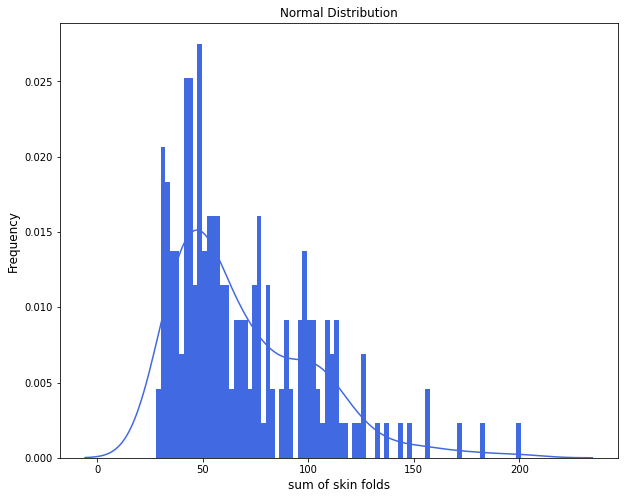

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.distplot(df['ssf'],
                  bins=80,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 10,'alpha':1})
plt.xlabel('sum of skin folds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Normal Distribution")
plt.show()

According to this graph,
* The average sum of skin folds is around 50.
* Here we can see that the sum of skin folds is widely distributed between 0 and 200.
* The majority of the athletes are in the range of 25 to 120 sum of skin.
* We can also see that the outliers are present in the data after 150, which can be neglected due to their lower frequency than others.


In [ ]:
# Calculate Skewness of the graph
print("Skewness of the graph: ")
print(skew(df['ssf'], axis=0, bias=True))

Skewness of the graph: 
1.174668451511767


Skewness essentially gauges how big the two tails are in comparison. As we all know, the skewness of a normal distribution must be zero. but here the skewness is more than zero, so it is left-tailed.

In [ ]:
# Calculate Kurtosis of the graph
print("Kurtosis of the graph: ")
print(kurtosis(df['ssf'], axis=0, bias=True))

Kurtosis of the graph: 
1.3651352231700065


The two tails' combined sizes are measured via kurtosis. The probability in the tails is measured. As we all know, the kurtosis of a standard normal distribution is 3 but here the value of kurtosis is less than 3 which means, the graph is light-tailed and has fewer outliers.

## <a id='toc1_6_'></a>[6. Uniform Distribution](#toc0_)

The uniform distribution is a symmetric probability in which the chances of all possible outcomes are the same. All of the values in the distribution have the same chance of happening, so they are all spread out in the same way. The "rectangular distribution" is another name for this type of distribution.

You can read more about it in <a href="https://en.wikipedia.org/wiki/Continuous_uniform_distribution">This link</a>.<br>

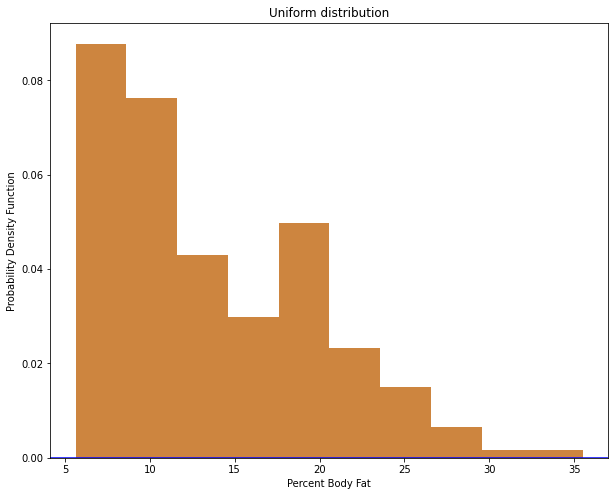

In [ ]:
# uniform library is used to maintain boundaries of the data
from scipy.stats import uniform

x=df['pcBfat'] 
plt.figure(figsize=(10,8))
plt.hist(x,density = True,color='peru')
plt.axhline(y=uniform.pdf(x[0]),color='b')
plt.title('Uniform distribution')
plt.ylabel('Probability Density Function')
plt.xlabel('Percent Body Fat')
plt.show()

This graph reveals that the density of the percentage of body fat is very low in the majority of the players.

* We can see a gradual decrease in the body's fat density.
* Athletes have a higher probability density of 5% to 12% of their body.
* We can also see that the density of 20% body fat is higher than that of 10% and 15% body fat.


## <a id='toc1_7_'></a>[7. Binomial Distribution](#toc0_)

The binomial is a discrete probability distribution that figures out how likely it is that an event will happen a certain number of times in a certain number of chances. Use this distribution for a binomial random variable. These variables keep track of how many times an event happens in a certain number of trials. There are only two possible outcomes, and they can't both happen.

* The value of a binomial is obtained by multiplying the number of independent trials by the successes.

You can read more about it in <a href="https://en.wikipedia.org/wiki/Binomial_distribution">This link</a>.<br>

In [ ]:
# Identify the unique values in sport column
df['sport'].unique()

array(['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt',
       'Tennis', 'Gym', 'W_Polo'], dtype=object)

In [ ]:
# Separating the dataframes based on their sport field.
df1 = df[df['sport'] == 'B_Ball']
df2 = df[df['sport'] == 'Swim']

In [ ]:
# displaying the rows of athletes from baseball
df1.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [ ]:
# displaying the rows of swimming athletes
df2.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
58,4.36,5.5,41.4,13.8,82,22.42,71.3,14.52,55.39,170.0,64.8,f,Swim
59,4.07,5.9,39.5,13.3,25,20.42,54.6,11.47,52.23,170.0,59.0,f,Swim
60,4.17,4.9,38.9,12.9,86,22.13,88.2,17.71,59.33,180.5,72.1,f,Swim
61,4.23,8.1,38.2,12.7,22,25.17,95.4,18.48,61.63,173.3,75.6,f,Swim
62,4.46,8.3,42.2,14.4,30,23.72,47.5,11.22,63.39,173.5,71.4,f,Swim


We are plotting graphs of the heights of basketball and swimming athletes here. so we can understand their height distribution among the sport's fields.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


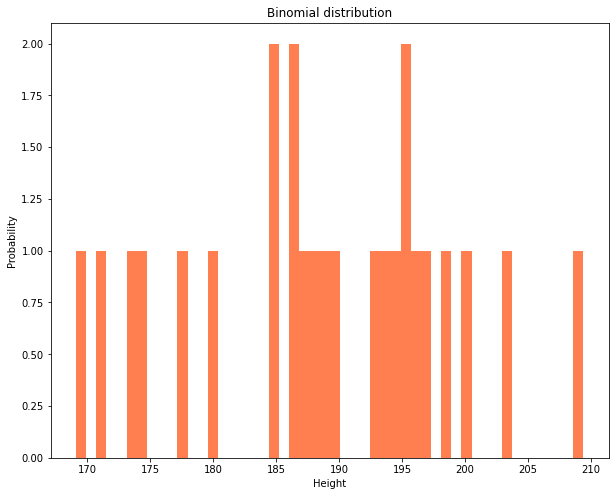

In [ ]:
# plotting a histogram for baseball athletes height
plt.figure(figsize=(10,8))
ax = sns.distplot(df1['ht'],
                  bins=50,
                  kde=False,
                  color='coral',
                  hist_kws={"linewidth": 15, 'alpha': 1}
)
plt.title('Binomial distribution')
plt.ylabel('Probability')
plt.xlabel('Height')
plt.show()

<Figure size 864x576 with 0 Axes>

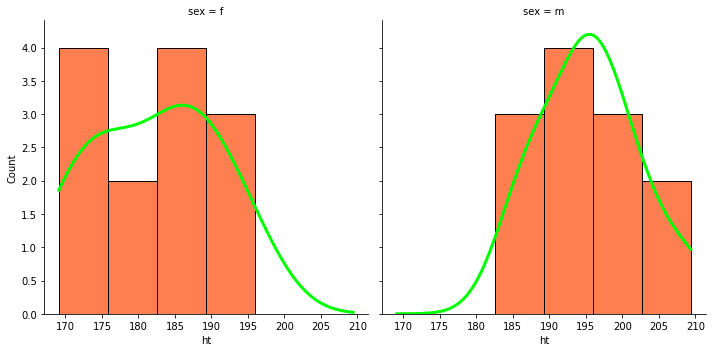

In [ ]:
# plotting a histogram based on sex for baseball athletes height 

ax=sns.displot(data=df1, x="ht", 
            kde=True, 
            col="sex", 
            color='lime',
            line_kws={'lw': 3}, 
            facecolor='coral', edgecolor='black')

We can see that the height of a baseball athlete is more likely to be 185, 187, or 196. 

* For male athletes in baseball, the range for height is around 190 to 195 cm.
* For female athletes in baseball, the range for height is around 185 to 190 cm.

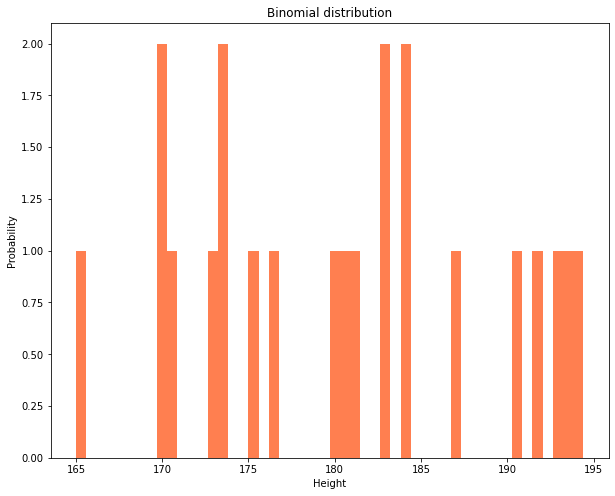

In [ ]:
# plotting a histogram for swimming athletes height
plt.figure(figsize=(10,8))
ax = sns.distplot(df2['ht'],
                  bins=50,
                  kde=False,
                  color='coral',
                  hist_kws={"linewidth": 15, 'alpha': 1})
plt.title('Binomial distribution')
plt.ylabel('Probability')
plt.xlabel('Height')
plt.show()

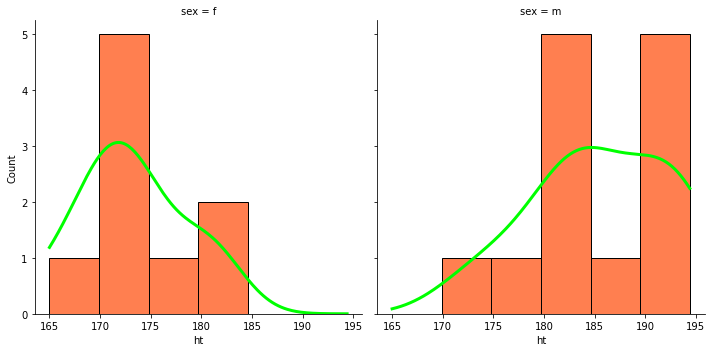

In [ ]:
# plotting a histogram based on sex for swimming athletes height 

ax=sns.displot(data=df2, x="ht", 
            kde=True, 
            col="sex", 
            color='lime',
            line_kws={'lw': 3}, 
            facecolor='coral', edgecolor='black')

Here we can see that the We can see that the height of a swimming athlete is more likely to be 170, 173, 183, or 184.

* For male athletes in swimming, the range for height is around 183 to 190 cm.
* For female athletes in swimming, the range for height is around 170 to 175 cm.

Based on the athletes' heights, we can conclude that the baseball player is slightly taller than the swimmer.

* This is mostly true for female athletes, but it is also true for male athletes to a lesser extent.

We are plotting graphs of the weights of basketball and swimming athletes here. so we can understand their weight distribution among the sport's fields.

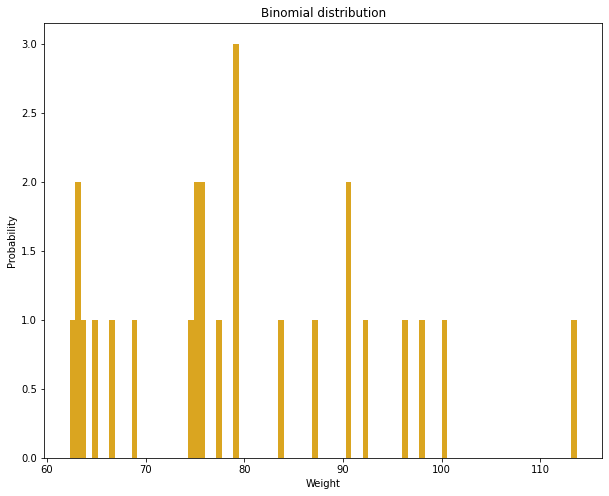

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.distplot(df1['wt'],
                  bins=90,
                  kde=False,
                  color='goldenrod',
                  hist_kws={"linewidth": 15, 'alpha': 1})
plt.title('Binomial distribution')
plt.ylabel('Probability')
plt.xlabel('Weight')
plt.show()

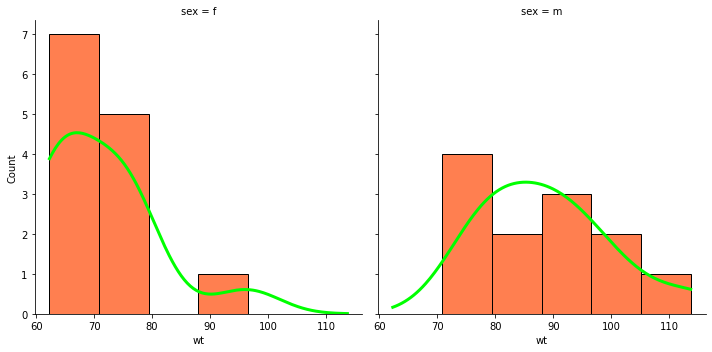

In [ ]:
# plotting a histogram based on sex for baseball athletes weight

ax=sns.displot(data=df1, x="wt", 
            kde=True, 
            col="sex", 
            color='lime',
            line_kws={'lw': 3}, 
            facecolor='coral', edgecolor='black')

The majority of players, as depicted in the graph above, weigh less than 80 kilograms.

* For male athletes in baseball, the range for weight is around 80 to 90 kg.
* For female athletes in baseball, the range for weight is around 63 to 70 kg.

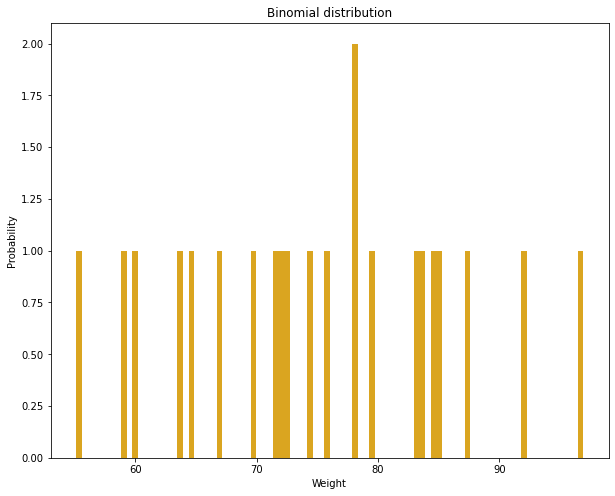

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.distplot(df2['wt'],
                  bins=90,
                  kde=False,
                  color='goldenrod',
                  hist_kws={"linewidth": 15, 'alpha': 1})
plt.title('Binomial distribution')
plt.ylabel('Probability')
plt.xlabel('Weight')
plt.show()

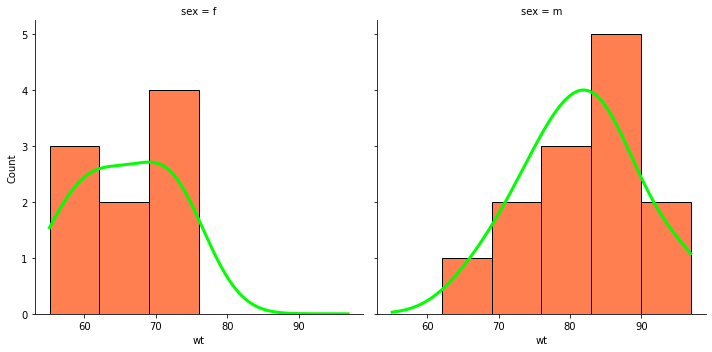

In [ ]:
# plotting a histogram based on sex for swimming athletes weight

ax=sns.displot(data=df2, x="wt", 
            kde=True, 
            col="sex", 
            color='lime',
            line_kws={'lw': 3}, 
            facecolor='coral', edgecolor='black')

The majority of players, as depicted in the graph above, weigh less than 80 kilograms.

* For male athletes in baseball, the range for weight is around 76 to 83 kg.
* For female athletes in baseball, the range for weight is around 60 to 71 kg.


Based on the athletes' weights, we can conclude that the baseball player is slightly heavier than the swimmer.

* This is mostly true for male athletes, but it is also true for female athletes to a lesser extent.
 



## <a id='toc1_8_'></a>[8. Bernoulli Distribution](#toc0_)

A Bernoulli distribution is a discrete distribution with only two possible values for the random variable. The distribution has only two possible outcomes and a single trial, which is called a Bernoulli trial. The two possible outcomes in the Bernoulli distribution are labeled n=0 and n=1 in which n=1 (success) occurs with probability p and n=0 (failure) occurs with probability 1-p, and since it is a probability value, so 0<=p<=1.

* The probability values of mutually exclusive events that encompass all the possible outcomes need to sum up to one.

You can read more about it in <a href="https://en.wikipedia.org/wiki/Bernoulli_distribution">This link</a>.<br>

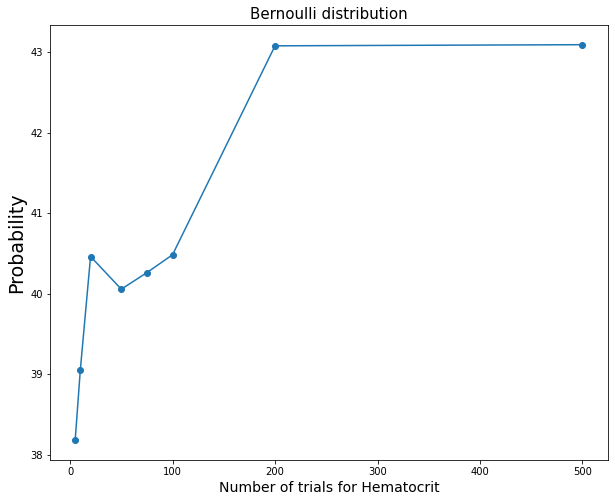

In [ ]:
sample = df["hc"]
num_trials = [5,10,20,50,75,100,200,500]
points = [sample[0:l].mean() for l in num_trials]
plt.figure(figsize=(10,8))
plt.plot(num_trials, points, marker='o')
plt.xlabel('Number of trials for Hematocrit', fontsize = 14)
plt.ylabel('Probability',fontsize= 19)
plt.title('Bernoulli distribution',fontsize= 15)
plt.show()

Here, we can see that after increasing the number of trials, the success rate of the Hematocrit percentage is high.

[Hematocrit is the percentage by volume of red cells in your blood]

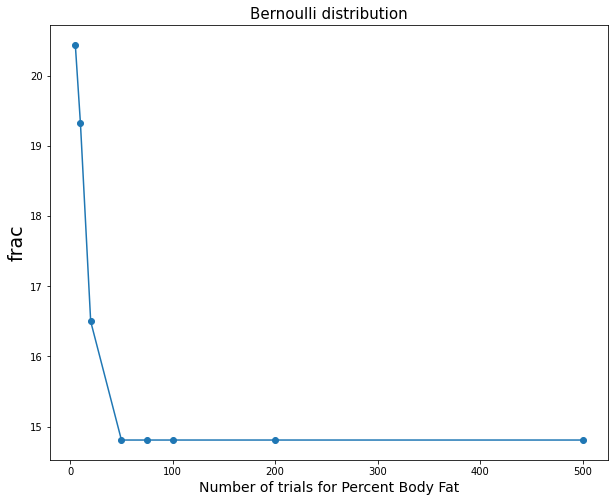

In [ ]:
sample = df1["pcBfat"]
num_trials = [5,10,20,50,75,100,200,500]
points = [sample[0:l].mean() for l in num_trials]
plt.figure(figsize=(10,8))
plt.plot(num_trials, points, marker='o')
plt.xlabel('Number of trials for Percent Body Fat', fontsize = 14)
plt.ylabel('frac', fontsize= 19)
plt.title('Bernoulli distribution',fontsize= 15)
plt.show()

However, as you can see, the success rate of reducing percent body fat decreases as the number of trails increases.

## <a id='toc1_9_'></a>[9. Poisson Distribution](#toc0_)

The definition of the poisson distribution is used to model the discrete probability of an event in which independent events happen at a known constant mean rate over a fixed amount of time. In other words, a Poisson distribution is used to figure out how often something is likely to happen in a certain amount of time. λ is the Poisson rate parameter that shows how many events are expected to happen on average in a fixed amount of time.

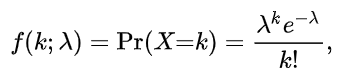

* When λ is a non-integer, the mode is the closest integer smaller than λ.
* When λ is an integer, there are two modes: λ and  λ−1.
* When λ is low, the distribution is much longer on the right side of its peak than its left (i.e., it is strongly right-skewed).
*  λ increases, the distribution looks more and more similar to a normal distribution.
<br>

You can read more about it in <a href="https://en.wikipedia.org/wiki/Poisson_distribution">This link</a>.<br>

For Posission Distributions and Exponential Distribution we'll import another dataset.

In [ ]:
df1 = pd.read_csv('athlete.csv')

In [ ]:
# loading the first 10 rows of the dataset
df1.head(10)

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
5,Neymar,95.0,2021,Soccer
6,Roger Federer,90.0,2021,Tennis
7,Lewis Hamilton,82.0,2021,Racing
8,Tom Brady,76.0,2021,Football
9,Kevin Durant,75.0,2021,Basketball


In [ ]:
# reviewing the columns of the dataset
df1.columns

Index(['Name', 'Earnings', 'Year', 'Sport'], dtype='object')

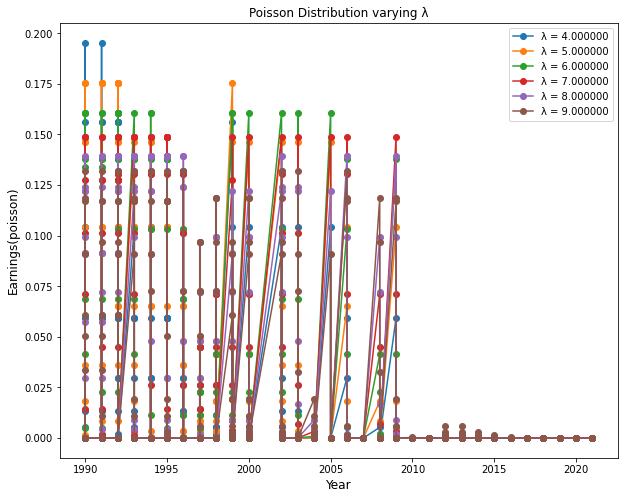

In [ ]:
plt.figure(figsize=(10,8))
for lambd in range(4, 10, 1):
    n = df1['Year']
    o = df1['Earnings']
    poisson = stats.poisson.pmf(n, lambd)
    poisson2 = stats.poisson.pmf(o, lambd)
    #plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.plot(n, poisson2, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Earnings(poisson)', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

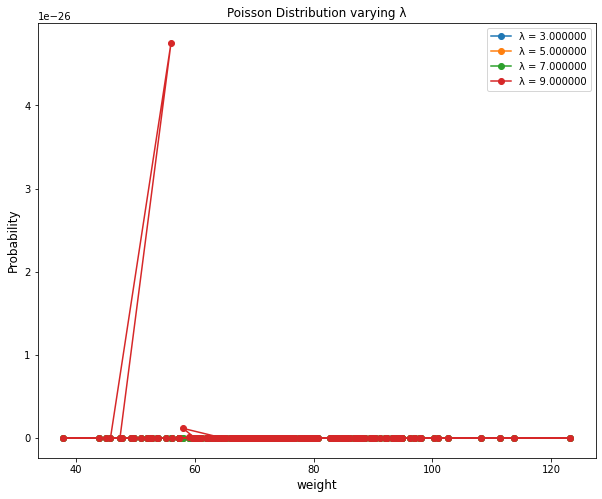

In [ ]:
plt.figure(figsize=(10,8))
for lambd in range(3, 10, 2):
    n = df['wt']
    poisson = stats.poisson.pmf(n, lambd)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('weight', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

According to the graphs, an increase in the parameter value also results in an increase in the chance of dependency over a predetermined amount of time.

The information presented in this graph demonstrates that a rise in the percentage of body fat does not have any impact on the possibility of another event occurring.

## <a id='toc1_10_'></a>[10. Exponential Distribution](#toc0_)

The exponential distribution is a type of continuous probability distribution that typically focuses on the amount of time remaining until a particular event takes place. It is a process in which events take place constantly and independently at a rate that is kept relatively constant overall.

* The key property of being memoryless
* The exponential random variable can be either more small values or fewer larger variables.

You can read more about it in <a href="https://en.wikipedia.org/wiki/Exponential_distribution">This link</a>.<br>

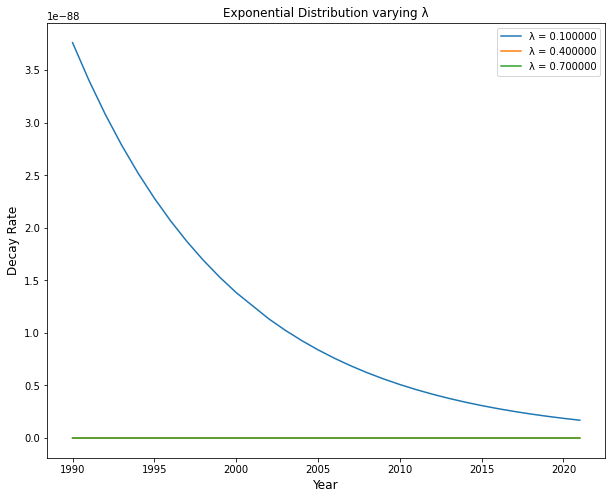

In [ ]:
plt.figure(figsize=(10,8))
for lambd in range(1,10, 3):
    x = df1['Year']
    y = 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y, label="λ = {:f}".format(0.1*lambd))
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()

This graph represents the year present in data is evenly distributed. 

In [ ]:
plt.figure(figsize=(10,8))
for lambd in range(4, 10, 1):
    n = df1['Year']
    o = df1['Earnings']
    poisson = stats.poisson.pmf(n, lambd)
    poisson2 = stats.poisson.pmf(o, lambd)
    #plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.plot(n, poisson2, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('Hemaglobin Concentration', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend() 

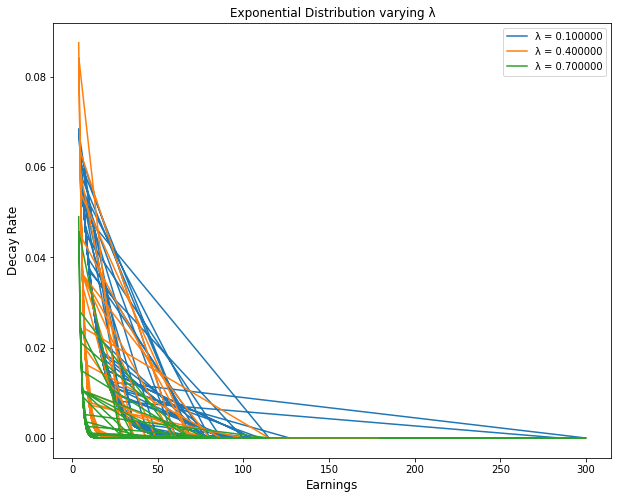

In [ ]:
plt.figure(figsize=(10,8))
for lambd in range(1,10, 3):
    x = df1['Earnings']
    y = 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y, label="λ = {:f}".format(0.1*lambd))
    plt.xlabel('Earnings', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()

If we look at the graph, we can see that the decay rate is quite low for larger parameter values. This indicates that the distribution of values in the sum of skin folds is less than 150.

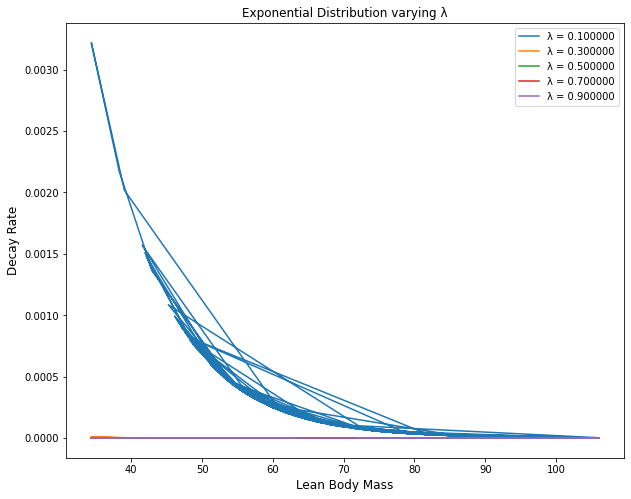

In [ ]:
#dataset 1

plt.figure(figsize=(10,8))
for lambd in range(1,10, 2):
    x = df['lbm']
    y = 0.1*lambd*np.exp(-0.1*lambd*x)
    plt.plot(x,y, label="λ = {:f}".format(0.1*lambd))
    plt.xlabel('Lean Body Mass', fontsize=12)
    plt.ylabel('Decay Rate', fontsize=12)
    plt.title("Exponential Distribution varying λ")
    plt.legend()

In a similar manner, we are able to state that a higher parameter value results in a lower decay rate, which in this case shows that the lean body mass is distributed below 90.

## <a id='toc1_11_'></a>[11. Conclusion](#toc0_)
From this Distributions we are able to find the probability of the occurance.